In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
server_test_results_raw = pd.read_csv("../test_server_results.csv")
server_test_results_raw.head()

,accuracy,round,timestamp,session_uuid
0,0.916889,1,2023-07-14 20:04:23.596545,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,0.941867,2,2023-07-14 20:04:32.373940,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,0.952178,3,2023-07-14 20:04:41.094058,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,0.961067,4,2023-07-14 20:04:50.319609,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,0.962756,5,2023-07-14 20:04:58.850636,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [104]:
client_test_results_raw = pd.read_csv("../test_client_results.csv")
client_test_results_raw.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9160,0.307644,1,2023-07-14 20:04:23.089550,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.9056,0.311643,1,2023-07-14 20:04:23.118554,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.9200,0.277598,1,2023-07-14 20:04:23.144553,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,7c4635c3-5948-4889-8f9a-ea35919d96e2,localhost,1883,0.9208,0.304338,1,2023-07-14 20:04:23.236561,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,9f3121fd-7d4d-4d7a-9cb2-0468d63b6f52,localhost,1883,0.9128,0.294131,1,2023-07-14 20:04:23.281552,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [105]:
client_train_results_raw = pd.read_csv("../train_client_results.csv")
client_train_results_raw.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,1,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.770000,0.702311,1,2023-07-14 20:04:17.929304,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,00bf3ee2-fb7b-45df-bc9b-2b061ec95402,localhost,1883,0.791667,0.668800,1,2023-07-14 20:04:17.977335,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.781667,0.670683,1,2023-07-14 20:04:17.982306,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,56f969a0-12d1-46e9-ac27-6706e6a5fbfb,localhost,1883,0.783000,0.685048,1,2023-07-14 20:04:18.204192,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [106]:
SESSION_ID = 'dd2bdfce-0c42-4360-9886-7ca3ce305375'

In [107]:
client_train_results_df = client_train_results_raw[client_train_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
client_test_results_df = client_test_results_raw[client_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
server_test_results_df = server_test_results_raw[server_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)

client_train_results_df['round'] = client_train_results_df['round'] - 1
client_test_results_df['round'] = client_test_results_df['round'] - 1
server_test_results_df['round'] = server_test_results_df['round'] - 1


In [108]:
client_train_results_df.head()

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,0,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.770000,0.702311,0,2023-07-14 20:04:17.929304,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,00bf3ee2-fb7b-45df-bc9b-2b061ec95402,localhost,1883,0.791667,0.668800,0,2023-07-14 20:04:17.977335,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,76a83e36-3488-4ac0-a9e9-1f5aff89a062,localhost,1883,0.781667,0.670683,0,2023-07-14 20:04:17.982306,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,56f969a0-12d1-46e9-ac27-6706e6a5fbfb,localhost,1883,0.783000,0.685048,0,2023-07-14 20:04:18.204192,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [109]:
client_train_results_per_trainer = [client_train_results_df[client_train_results_df['uuid'] == uuid] for uuid in client_train_results_df['uuid'].unique()]

In [110]:
client_train_results_per_trainer[0]

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.795667,0.639913,0,2023-07-14 20:04:17.913314,dd2bdfce-0c42-4360-9886-7ca3ce305375
10,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.890667,0.337667,1,2023-07-14 20:04:27.166893,dd2bdfce-0c42-4360-9886-7ca3ce305375
17,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.923667,0.236729,2,2023-07-14 20:04:35.790868,dd2bdfce-0c42-4360-9886-7ca3ce305375
25,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.937000,0.215023,3,2023-07-14 20:04:44.235356,dd2bdfce-0c42-4360-9886-7ca3ce305375
33,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.944000,0.182054,4,2023-07-14 20:04:53.966081,dd2bdfce-0c42-4360-9886-7ca3ce305375
40,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.959000,0.138660,5,2023-07-14 20:05:02.114435,dd2bdfce-0c42-4360-9886-7ca3ce305375
55,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.965333,0.131508,7,2023-07-14 20:05:19.963095,dd2bdfce-0c42-4360-9886-7ca3ce305375
63,f2252504-27b9-4ddb-b254-83627a2c684c,localhost,1883,0.971333,0.097275,8,2023-07-14 20:05:28.325500,dd2bdfce-0c42-4360-9886-7ca3ce305375


In [111]:
client_test_results_per_trainer = [client_test_results_df[client_test_results_df['uuid'] == uuid].reset_index(drop=True) for uuid in client_test_results_df['uuid'].unique()]

In [112]:
client_test_results_per_trainer[0]

,uuid,host,port,accuracy,loss,round,timestamp,session_uuid
0,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9160,0.307644,0,2023-07-14 20:04:23.089550,dd2bdfce-0c42-4360-9886-7ca3ce305375
1,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9344,0.225521,1,2023-07-14 20:04:32.088084,dd2bdfce-0c42-4360-9886-7ca3ce305375
2,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9552,0.153224,2,2023-07-14 20:04:40.971064,dd2bdfce-0c42-4360-9886-7ca3ce305375
3,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9520,0.161844,3,2023-07-14 20:04:50.126945,dd2bdfce-0c42-4360-9886-7ca3ce305375
4,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9632,0.124262,4,2023-07-14 20:04:58.566655,dd2bdfce-0c42-4360-9886-7ca3ce305375
5,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9688,0.103382,5,2023-07-14 20:05:07.194962,dd2bdfce-0c42-4360-9886-7ca3ce305375
6,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9728,0.087426,6,2023-07-14 20:05:15.678620,dd2bdfce-0c42-4360-9886-7ca3ce305375
7,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9712,0.093771,7,2023-07-14 20:05:24.394840,dd2bdfce-0c42-4360-9886-7ca3ce305375
8,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9840,0.071863,8,2023-07-14 20:05:33.061337,dd2bdfce-0c42-4360-9886-7ca3ce305375
9,6ee40a05-c191-4e06-a5f0-05c934558f13,localhost,1883,0.9784,0.072117,9,2023-07-14 20:05:41.973005,dd2bdfce-0c42-4360-9886-7ca3ce305375


## Analysing training results

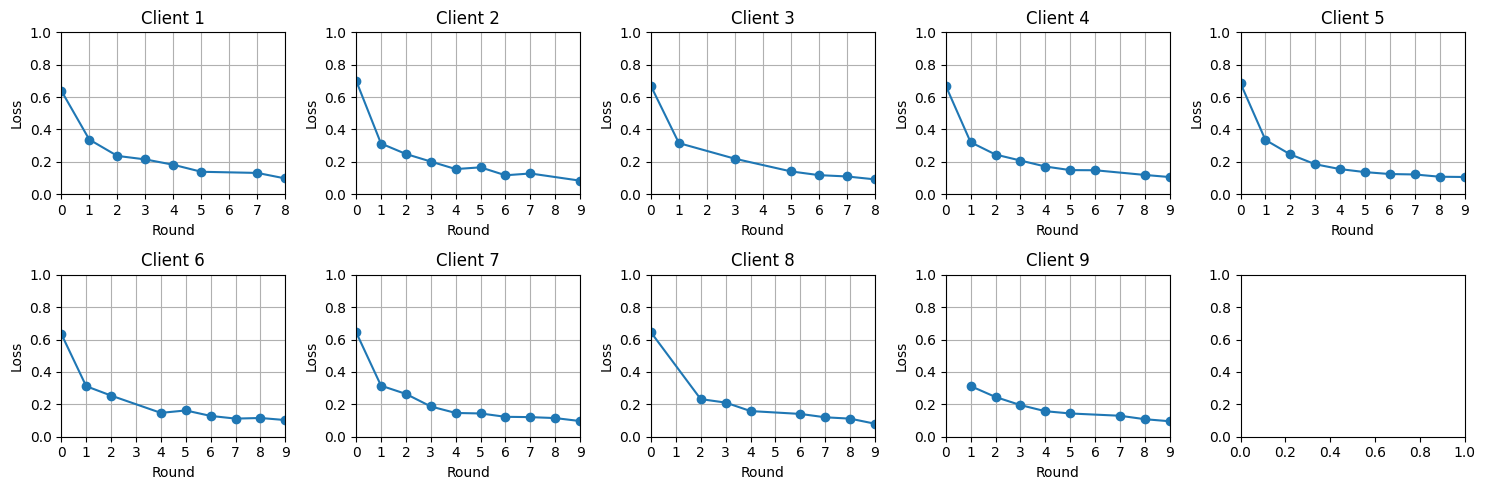

In [113]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        if i == 1 and j == 4:
            break
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['loss'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("Loss")
        axs[i, j].set_ylim(0, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_loss_{SESSION_ID}.png")

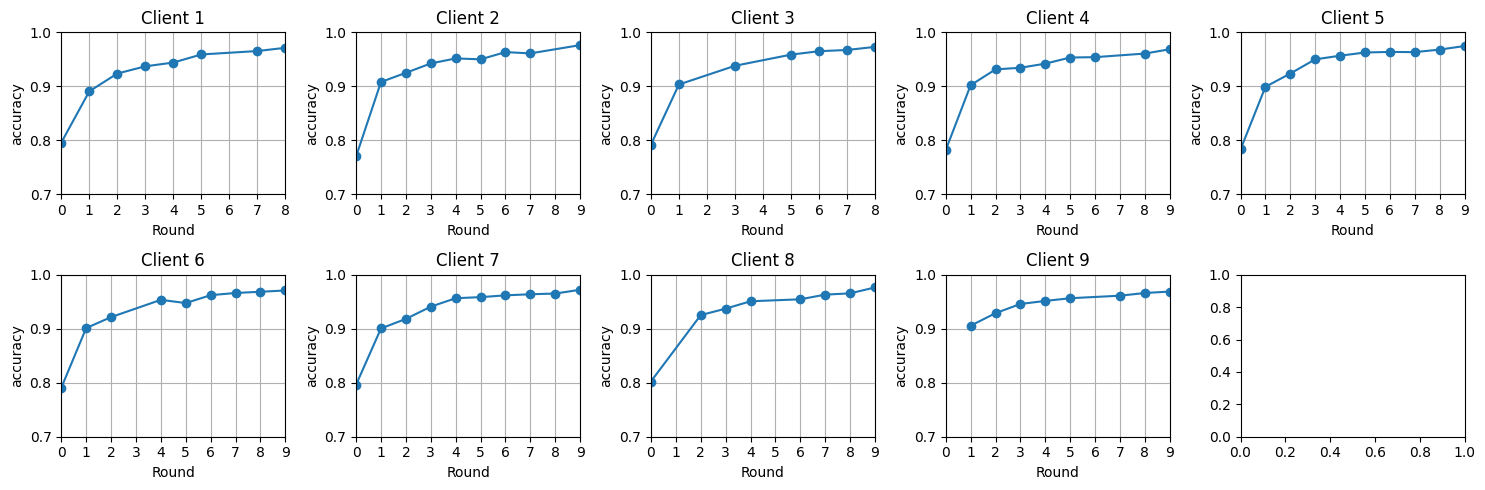

In [114]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        if i == 1 and j == 4:
            break
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['accuracy'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("accuracy")
        axs[i, j].set_ylim(0.7, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_acc_{SESSION_ID}.png")

## Analysing server test results

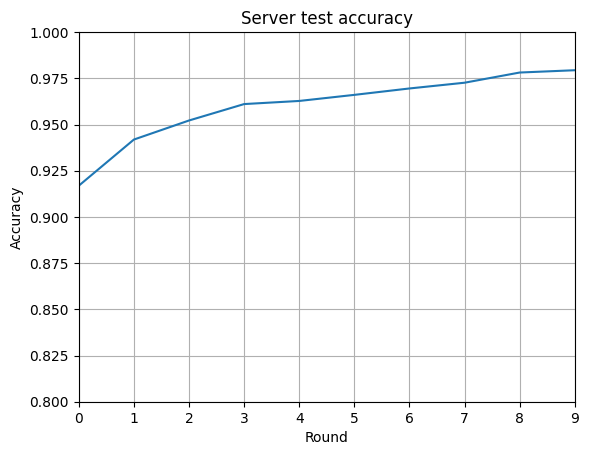

In [115]:
plt.plot(server_test_results_df['round'], server_test_results_df['accuracy'])
plt.title("Server test accuracy")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.xlim(0, max(server_test_results_df['round']))
plt.grid()

plt.savefig(f"server_test_acc_{SESSION_ID}.png")


## Analyzing test results for different amount of rounds

In [116]:
server_test_results_10df = server_test_results_df

In [117]:
server_test_results_20df = server_test_results_raw[server_test_results_raw['session_uuid'] == '5580a9e0-1732-442e-b470-8aba5475da6a'].reset_index(drop=True)
server_test_results_40df = server_test_results_raw[server_test_results_raw['session_uuid'] == 'b5cd2d55-c972-49df-bc5a-21abdb30293f'].reset_index(drop=True)

server_test_results_20df['round'] = server_test_results_20df['round'] - 1
server_test_results_40df['round'] = server_test_results_40df['round'] - 1

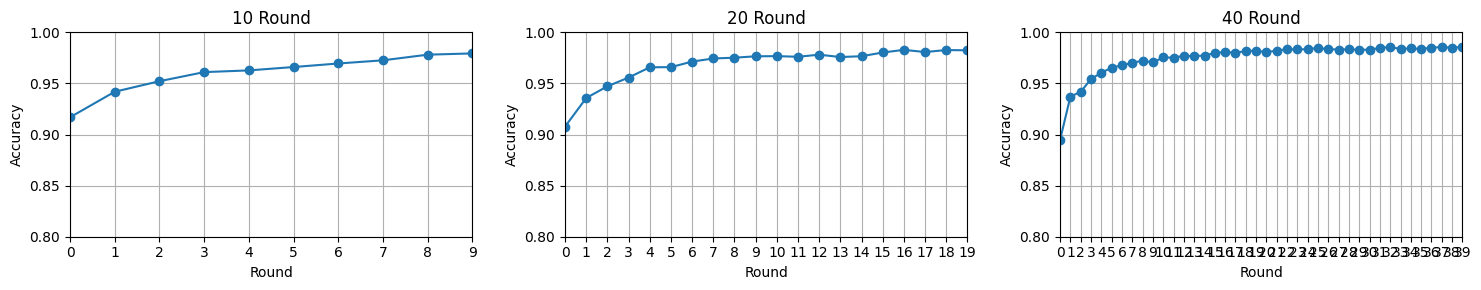

In [118]:
col = 3
row = 1

fig, axs = plt.subplots(row, col, figsize=(15, 3))

axs[0].plot(server_test_results_10df['round'], server_test_results_10df['accuracy'], marker='o')
axs[0].set_title("10 Round")
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(0.8, 1)
axs[0].set_xlim(0, max(server_test_results_10df['round']))
axs[0].set_xticks(range(0, max(server_test_results_10df['round']) + 1, 1))
axs[0].grid()

axs[1].plot(server_test_results_20df['round'], server_test_results_20df['accuracy'], marker='o')
axs[1].set_title("20 Round")
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim(0.8, 1)
axs[1].set_xlim(0, max(server_test_results_20df['round']))
axs[1].set_xticks(range(0, max(server_test_results_20df['round']) + 1, 1))
axs[1].grid()

axs[2].plot(server_test_results_40df['round'], server_test_results_40df['accuracy'], marker='o')
axs[2].set_title("40 Round")
axs[2].set_xlabel("Round")
axs[2].set_ylabel("Accuracy")
axs[2].set_ylim(0.8, 1)
axs[2].set_xlim(0, max(server_test_results_40df['round']))
axs[2].set_xticks(range(0, max(server_test_results_40df['round']) + 1, 1))
axs[2].grid()

fig.tight_layout()

plt.savefig(f"server_test_acc_10_20_40.png")

## Analyzing time

In [119]:
# transform string and alculate the time difference between max_time and min_time
def transform_time(time):
    print(time)
    time = time.split('.')[0]
    time = time.replace('T', ' ')
    print(time)
    return pd.to_datetime(time)

In [120]:
SESSION_ID_10 = 'dd2bdfce-0c42-4360-9886-7ca3ce305375'
SESSION_ID_20 = '5580a9e0-1732-442e-b470-8aba5475da6a'
SESSION_ID_40 = 'b5cd2d55-c972-49df-bc5a-21abdb30293f'

client_train_results_copy_df = client_train_results_raw.copy()
client_test_results_copy_df = client_test_results_raw.copy()
server_test_results_copy_df = server_test_results_raw.copy()

client_train_results_copy_df['round'] = client_train_results_copy_df['round'] - 1
client_test_results_copy_df['round'] = client_test_results_copy_df['round'] - 1
server_test_results_copy_df['round'] = server_test_results_copy_df['round'] - 1

client_train_results_10df = client_train_results_copy_df[client_train_results_copy_df['session_uuid'] == SESSION_ID_10].reset_index(drop=True)
client_test_results_10df = client_test_results_copy_df[client_test_results_copy_df['session_uuid'] == SESSION_ID_10].reset_index(drop=True)
server_test_results_10df = server_test_results_copy_df[server_test_results_copy_df['session_uuid'] == SESSION_ID_10].reset_index(drop=True)

client_train_results_20df = client_train_results_copy_df[client_train_results_copy_df['session_uuid'] == SESSION_ID_20].reset_index(drop=True)
client_test_results_20df = client_test_results_copy_df[client_test_results_copy_df['session_uuid'] == SESSION_ID_20].reset_index(drop=True)
server_test_results_20df = server_test_results_copy_df[server_test_results_copy_df['session_uuid'] == SESSION_ID_20].reset_index(drop=True)

client_train_results_40df = client_train_results_copy_df[client_train_results_copy_df['session_uuid'] == SESSION_ID_40].reset_index(drop=True)
client_test_results_40df = client_test_results_copy_df[client_test_results_copy_df['session_uuid'] == SESSION_ID_40].reset_index(drop=True)
server_test_results_40df = server_test_results_copy_df[server_test_results_copy_df['session_uuid'] == SESSION_ID_40].reset_index(drop=True)

In [125]:
timestamp_df_10 = client_train_results_10df['timestamp']
timestamp_df_10 = pd.concat([timestamp_df_10, client_train_results_10df['timestamp']])
timestamp_df_10 = pd.concat([timestamp_df_10, client_train_results_10df['timestamp']])

max_time_10_aux = timestamp_df_10.max()
min_time_10_aux = timestamp_df_10.min()

max_time_10 = transform_time(max_time_10_aux)
min_time_10 = transform_time(min_time_10_aux)

diff_time_mqqt10 = max_time_10 - min_time_10

2023-07-14 20:05:37.977277
2023-07-14 20:05:37
2023-07-14 20:04:17.913314
2023-07-14 20:04:17


In [126]:
timestamp_df_20 = client_train_results_20df['timestamp']
timestamp_df_20 = pd.concat([timestamp_df_20, client_train_results_20df['timestamp']])
timestamp_df_20 = pd.concat([timestamp_df_20, client_train_results_20df['timestamp']])

max_time_20_aux = timestamp_df_20.max()
min_time_20_aux = timestamp_df_20.min()

max_time_20 = transform_time(max_time_20_aux)
min_time_20 = transform_time(min_time_20_aux)

diff_time_mqqt20 = max_time_20 - min_time_20

2023-07-14 20:12:55.078610
2023-07-14 20:12:55
2023-07-14 20:10:05.352459
2023-07-14 20:10:05


In [127]:
timestamp_df_40 = client_train_results_40df['timestamp']
print(timestamp_df_40.min())
timestamp_df_40 = pd.concat([timestamp_df_40, client_train_results_40df['timestamp']])
print(timestamp_df_40.min())
timestamp_df_40 = pd.concat([timestamp_df_40, client_train_results_40df['timestamp']])
print(timestamp_df_40.min())

max_time_40_aux = timestamp_df_40.max()
min_time_40_aux = timestamp_df_40.min()

max_time_40 = transform_time(max_time_40_aux)
min_time_40 = transform_time(min_time_40_aux)

print(max_time_40)
print(min_time_40)

diff_time_mqqt40 = max_time_40 - min_time_40

2023-07-14 20:14:53.783786
2023-07-14 20:14:53.783786
2023-07-14 20:14:53.783786
2023-07-14 20:20:39.878692
2023-07-14 20:20:39
2023-07-14 20:14:53.783786
2023-07-14 20:14:53
2023-07-14 20:20:39
2023-07-14 20:14:53


In [128]:
print(f"MQQT 10: {diff_time_mqqt10}")
print(f"MQQT 20: {diff_time_mqqt20}")
print(f"MQQT 40: {diff_time_mqqt40}")

MQQT 10: 0 days 00:01:20
MQQT 20: 0 days 00:02:50
MQQT 40: 0 days 00:05:46


In [129]:
grpc_train_client_df_raw = pd.read_csv("https://raw.githubusercontent.com/beamaia/federated_system_mnist/main/train_client_results.csv")
grpc_train_client_df_raw.head()

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.903611,0.316070,1,2023-05-21 18:33:56.775002,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.921333,0.264677,2,2023-05-21 18:33:59.669017,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.940000,0.208374,3,2023-05-21 18:34:06.675010,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.948667,0.179368,4,2023-05-21 18:34:14.131769,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.957333,0.147306,5,2023-05-21 18:34:19.222761,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [130]:
grpc_test_client_df_raw = pd.read_csv("https://raw.githubusercontent.com/beamaia/federated_system_mnist/main/test_client_results.csv")
grpc_test_client_df_raw.head()

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.927,0.272055,0,2023-05-21 18:33:52.526007,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.949,0.168748,1,2023-05-21 18:33:57.234012,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.946,0.149910,2,2023-05-21 18:34:03.604009,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.965,0.111979,3,2023-05-21 18:34:09.930762,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.960,0.118008,4,2023-05-21 18:34:16.105764,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [133]:
grpc_test_server_df_raw = pd.read_csv("https://raw.githubusercontent.com/beamaia/federated_system_mnist/main/test_server_results.csv")
grpc_test_server_df_raw.head()

,accuracy,round,timestamp,session_uuid
0,0.9210,0,2023-05-21 18:33:52.545013,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,0.9427,1,2023-05-21 18:33:57.489007,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,0.9515,2,2023-05-21 18:34:03.886010,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,0.9622,3,2023-05-21 18:34:10.184757,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,0.9669,4,2023-05-21 18:34:16.288754,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [134]:
SESSION_ID_10 = '000d635f-2206-4ab3-99b2-bd49a3c75fad'
SESSION_ID_20 = 'f7ba8079-9c60-4f21-ab92-f4715fa4c1e9'
SESSION_ID_40 = '43a1bcbf-ce48-42c2-b5b3-fb48d8685482'


grpc_client_train_results_10df = grpc_train_client_df_raw[grpc_train_client_df_raw['session_uuid'] == SESSION_ID_10].reset_index(drop=True)
grpc_client_test_results_10df = grpc_test_client_df_raw[grpc_test_client_df_raw['session_uuid'] == SESSION_ID_10].reset_index(drop=True)
grpc_server_test_results_10df = grpc_test_server_df_raw[grpc_test_server_df_raw['session_uuid'] == SESSION_ID_10].reset_index(drop=True)

grpc_client_train_results_20df = grpc_train_client_df_raw[grpc_train_client_df_raw['session_uuid'] == SESSION_ID_20].reset_index(drop=True)
grpc_client_test_results_20df = grpc_test_client_df_raw[grpc_test_client_df_raw['session_uuid'] == SESSION_ID_20].reset_index(drop=True)
grpc_server_test_results_20df = grpc_test_server_df_raw[grpc_test_server_df_raw['session_uuid'] == SESSION_ID_20].reset_index(drop=True)

grpc_client_train_results_40df = grpc_train_client_df_raw[grpc_train_client_df_raw['session_uuid'] == SESSION_ID_40].reset_index(drop=True)
grpc_client_test_results_40df = grpc_test_client_df_raw[grpc_test_client_df_raw['session_uuid'] == SESSION_ID_40].reset_index(drop=True)
grpc_server_test_results_40df = grpc_test_server_df_raw[grpc_test_server_df_raw['session_uuid'] == SESSION_ID_40].reset_index(drop=True)

In [135]:
timestamp_df_10 = grpc_client_train_results_10df['timestamp']
timestamp_df_10 = pd.concat([timestamp_df_10, grpc_client_test_results_10df['timestamp']])
timestamp_df_10 = pd.concat([timestamp_df_10, grpc_server_test_results_10df['timestamp']])

max_time_10_aux = timestamp_df_10.max()
min_time_10_aux = timestamp_df_10.min()

max_time_10 = transform_time(max_time_10_aux)
min_time_10 = transform_time(min_time_10_aux)

diff_time_grpc10 = max_time_10 - min_time_10

2023-05-21 19:10:00.514739
2023-05-21 19:10:00
2023-05-21 19:09:10.275999
2023-05-21 19:09:10


In [136]:
timestamp_df_20 = grpc_client_train_results_20df['timestamp']
timestamp_df_20 = pd.concat([timestamp_df_20, grpc_client_test_results_20df['timestamp']])
timestamp_df_20 = pd.concat([timestamp_df_20, grpc_server_test_results_20df['timestamp']])

max_time_20_aux = timestamp_df_20.max()
min_time_20_aux = timestamp_df_20.min()

max_time_20 = transform_time(max_time_20_aux)
min_time_20 = transform_time(min_time_20_aux)

diff_time_grpc20 = max_time_20 - min_time_20

2023-05-21 19:53:06.167049
2023-05-21 19:53:06
2023-05-21 19:51:36.092052
2023-05-21 19:51:36


In [137]:
timestamp_df_40 = grpc_client_train_results_40df['timestamp']
timestamp_df_40 = pd.concat([timestamp_df_40, grpc_client_test_results_40df['timestamp']])
timestamp_df_40 = pd.concat([timestamp_df_40, grpc_server_test_results_40df['timestamp']])

max_time_40_aux = timestamp_df_40.max()
min_time_40_aux = timestamp_df_40.min()

max_time_40 = transform_time(max_time_40_aux)
min_time_40 = transform_time(min_time_40_aux)
print(max_time_40)
print(min_time_40)
diff_time_grpc40 = max_time_40 - min_time_40

2023-05-21 19:59:16.077229
2023-05-21 19:59:16
2023-05-21 19:56:00.200816
2023-05-21 19:56:00
2023-05-21 19:59:16
2023-05-21 19:56:00


In [138]:
print(f"GRPC 10: {diff_time_grpc10}")
print(f"GRPC 20: {diff_time_grpc20}")
print(f"GRPC 40: {diff_time_grpc40}")

GRPC 10: 0 days 00:00:50
GRPC 20: 0 days 00:01:30
GRPC 40: 0 days 00:03:16


In [139]:
print(f"MQQT 10: {diff_time_mqqt10}")
print(f"MQQT 20: {diff_time_mqqt20}")
print(f"MQQT 40: {diff_time_mqqt40}")

MQQT 10: 0 days 00:01:20
MQQT 20: 0 days 00:02:50
MQQT 40: 0 days 00:05:46


[80.0, 170.0, 346.0]
[50.0, 90.0, 196.0]


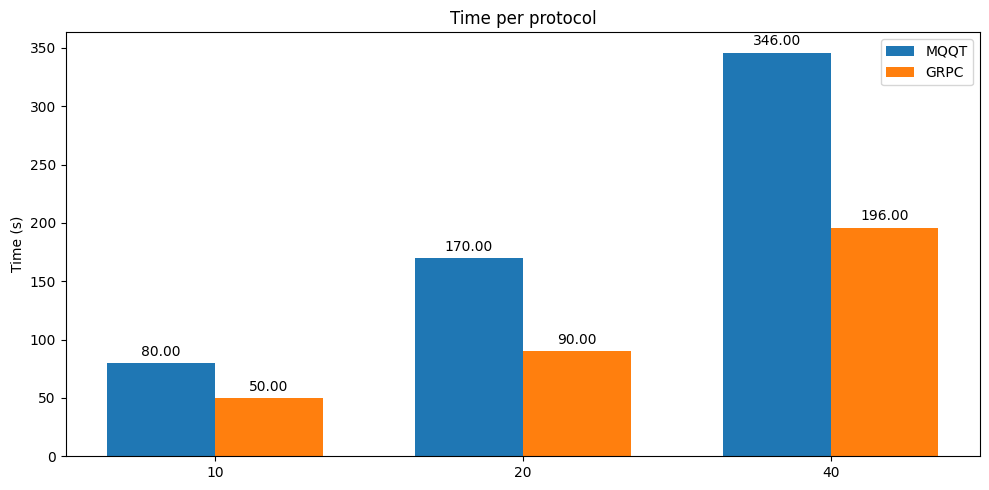

In [140]:
# bar plot, comparing the time between the two protocols
import numpy as np

labels = ['MQQT', 'GRPC']
mqqt = [diff_time_mqqt10.total_seconds(), diff_time_mqqt20.total_seconds(), diff_time_mqqt40.total_seconds()]
grpc = [diff_time_grpc10.total_seconds(), diff_time_grpc20.total_seconds(), diff_time_grpc40.total_seconds()]

print(mqqt)
print(grpc)

x = np.arange(3)
x_labels = [10, 20, 40]
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, mqqt, width, label='MQQT')
rects2 = ax.bar(x + width/2, grpc, width, label='GRPC')

ax.set_ylabel('Time (s)')
ax.set_title('Time per protocol')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

# plot numbers above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig(f"time_per_protocol.png")


